In [37]:
#library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [38]:
gas_files=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\NEUTRAL NETWORK\\gas_turbines.csv")

In [39]:
gas_files

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [40]:
#Checking for null values

In [41]:
gas_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [43]:
gas_files[gas_files.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
# Distributions of the independant variables

<AxesSubplot:xlabel='AT', ylabel='Density'>

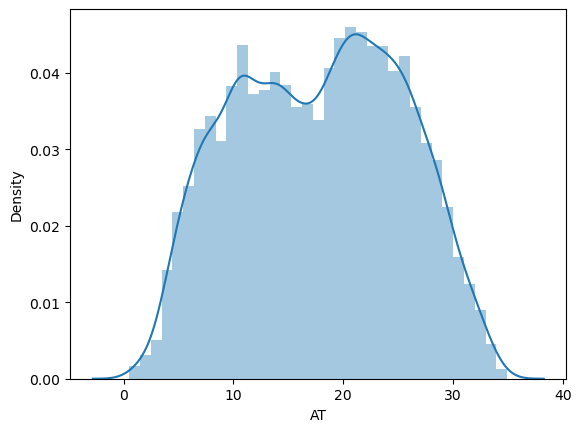

In [44]:
sns.distplot(gas_files.AT)

<AxesSubplot:xlabel='AP', ylabel='Density'>

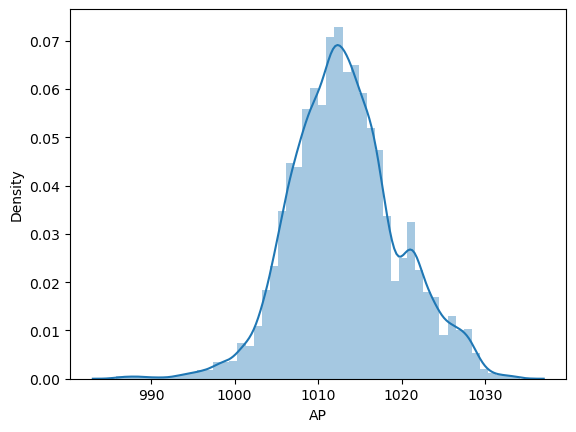

In [45]:
sns.distplot(gas_files.AP)

<AxesSubplot:xlabel='AH', ylabel='Density'>

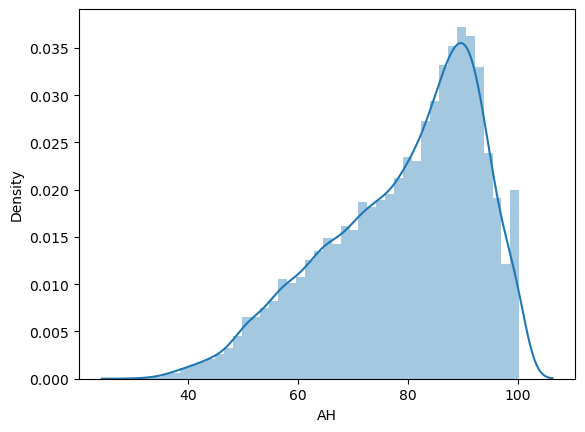

In [46]:
sns.distplot(gas_files.AH)

### Splitting dependant and independant variables

In [47]:
y=gas_files["TEY"]

### Only taking ambient variables as independant variables

In [48]:
x=gas_files.iloc[:,:3]

In [49]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### Converting the independant variables into a numpy array

In [50]:
x1=x.values

In [51]:
x1


array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [52]:
y1=y.values

In [53]:
y1

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

### Model Building

In [54]:
#We use relu as activation function n input and hidden layers and linear as activation function in the output layer.

In [55]:
#We use mean squared error as the loss function

In [56]:
model=Sequential()
model.add(Dense(3,  activation='relu'))
model.add(Dense(3,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [57]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
history=model.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 9s 6ms/step - loss: 5230.9614 - val_loss: 247.6426
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 257.8622 - val_loss: 245.5643
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 255.5866 - val_loss: 246.4146
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 253.8181 - val_loss: 240.7801
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 250.0765 - val_loss: 242.4812
Epoch 6/250
1008/1008 [==============================] - 3s 3ms/step - loss: 246.7278 - val_loss: 251.8138
Epoch 7/250
1008/1008 [==============================] - 3s 3ms/step - loss: 243.6110 - val_loss: 231.3323
Epoch 8/250
1008/1008 [==============================] - 3s 2ms/step - loss: 240.1229 - val_loss: 241.8206
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 237.3729 - val_loss: 238.8188
Epoch 10/250
1008/1008 [============

Epoch 77/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4185 - val_loss: 224.6010
Epoch 78/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4207 - val_loss: 223.8270
Epoch 79/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.7252 - val_loss: 242.8587
Epoch 80/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.0099 - val_loss: 223.4788
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.6690 - val_loss: 223.4769
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3681 - val_loss: 229.1895
Epoch 83/250
1008/1008 [==============================] - 3s 2ms/step - loss: 226.1622 - val_loss: 233.0602
Epoch 84/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.7937 - val_loss: 223.4003
Epoch 85/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.8694 - val_loss: 232.6697
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 2s 2ms/step - loss: 224.7937 - val_loss: 224.9838
Epoch 228/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.3090 - val_loss: 240.1436
Epoch 229/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.5732 - val_loss: 243.2554
Epoch 230/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.3171 - val_loss: 224.7142
Epoch 231/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.1254 - val_loss: 223.5631
Epoch 232/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.7343 - val_loss: 223.3291
Epoch 233/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.4734 - val_loss: 226.3923
Epoch 234/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.8297 - val_loss: 235.3995
Epoch 235/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.2239 - val_loss: 225.4069
Epoch 236/250
1008/1008 [========

In [59]:
model.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 224.2830


224.28302001953125

### The model has as mse error of 223.43

In [60]:
pred=model.predict(x1)

470/470 [==============================] - 1s 2ms/step


In [61]:
pred

array([[135.48691],
       [135.53053],
       [135.87735],
       ...,
       [134.05084],
       [134.49355],
       [135.08472]], dtype=float32)

In [62]:
history.history

{'loss': [5230.96142578125,
  257.86224365234375,
  255.5866241455078,
  253.81809997558594,
  250.0765380859375,
  246.72776794433594,
  243.6110076904297,
  240.12290954589844,
  237.37286376953125,
  234.8578338623047,
  232.63482666015625,
  231.2984619140625,
  230.12574768066406,
  228.67611694335938,
  228.64122009277344,
  226.5030517578125,
  227.2073211669922,
  226.9995574951172,
  226.52096557617188,
  226.9447479248047,
  227.2725067138672,
  227.17498779296875,
  226.50677490234375,
  225.35208129882812,
  225.92544555664062,
  225.9541015625,
  226.4868927001953,
  225.57415771484375,
  225.9492645263672,
  226.18869018554688,
  226.40313720703125,
  225.90223693847656,
  225.74049377441406,
  226.38467407226562,
  226.1968536376953,
  226.00645446777344,
  226.095947265625,
  226.38418579101562,
  226.3260498046875,
  225.9454345703125,
  226.3595428466797,
  226.4757080078125,
  227.09091186523438,
  226.9007110595703,
  225.93780517578125,
  226.85308837890625,
  225.

### Plotting the mse error vs epoch

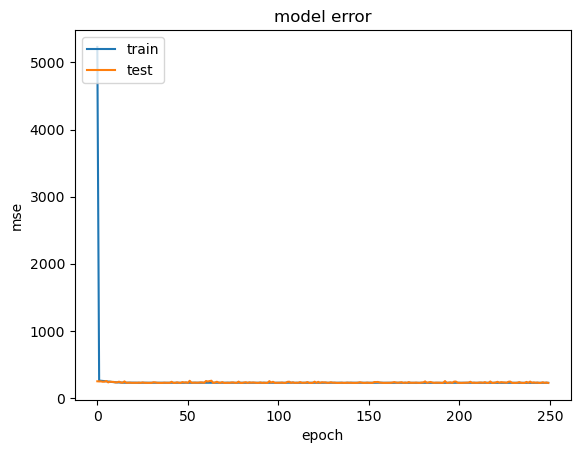

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### decreasing the nodes in hidden layer

In [64]:
model2=Sequential()
model2.add(Dense(3,  activation='relu'))
model2.add(Dense(2,  activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')
history=model2.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 4s 3ms/step - loss: 4624.0762 - val_loss: 229.9454
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 243.0995 - val_loss: 223.5309
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 242.2345 - val_loss: 221.1502
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 242.2511 - val_loss: 231.7123
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 239.2326 - val_loss: 223.4151
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 237.9266 - val_loss: 242.5715
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 235.8095 - val_loss: 265.8333
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 233.4898 - val_loss: 218.7559
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 233.8465 - val_loss: 220.9728
Epoch 10/250
1008/1008 [============

Epoch 77/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.6367 - val_loss: 227.7893
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 226.1361 - val_loss: 223.4282
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.9635 - val_loss: 223.3678
Epoch 80/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.9265 - val_loss: 235.6805
Epoch 81/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.6369 - val_loss: 223.5737
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.0188 - val_loss: 225.6079
Epoch 83/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.0597 - val_loss: 227.1816
Epoch 84/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.5169 - val_loss: 224.3893
Epoch 85/250
1008/1008 [==============================] - 3s 3ms/step - loss: 226.3040 - val_loss: 229.7926
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 3s 3ms/step - loss: 225.5625 - val_loss: 227.0163
Epoch 228/250
1008/1008 [==============================] - 3s 2ms/step - loss: 225.1396 - val_loss: 225.4547
Epoch 229/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.6628 - val_loss: 224.7761
Epoch 230/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.5008 - val_loss: 223.4624
Epoch 231/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.8788 - val_loss: 225.7662
Epoch 232/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.6143 - val_loss: 223.4534
Epoch 233/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.2538 - val_loss: 223.7180
Epoch 234/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.2044 - val_loss: 224.1521
Epoch 235/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.1833 - val_loss: 230.3257
Epoch 236/250
1008/1008 [========

In [65]:
model2.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 223.7153


223.7152557373047

### This model gives a significantly worse error:

In [66]:
#  additional hidden layer to the model:

In [67]:
model3=Sequential()
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer='adam')
history=model3.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 38s 3ms/step - loss: 32098.3398 - val_loss: 17431.6074
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: 18226.6016 - val_loss: 17198.9121
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17977.1328 - val_loss: 16949.2715
Epoch 4/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17718.0039 - val_loss: 16694.9980
Epoch 5/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17456.9004 - val_loss: 16440.6367
Epoch 6/250
1008/1008 [==============================] - 3s 3ms/step - loss: 17196.5312 - val_loss: 16187.6328
Epoch 7/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16937.6973 - val_loss: 15936.3770
Epoch 8/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16680.6289 - val_loss: 15686.9150
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 16425.4219 - val_loss: 15439.3008


Epoch 75/250
1008/1008 [==============================] - 3s 3ms/step - loss: 4032.5081 - val_loss: 3551.7195
Epoch 76/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3911.9900 - val_loss: 3438.7769
Epoch 77/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3793.4229 - val_loss: 3327.8333
Epoch 78/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3676.8828 - val_loss: 3218.9326
Epoch 79/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3562.3679 - val_loss: 3111.9453
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3449.8784 - val_loss: 3007.0640
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3339.2712 - val_loss: 2904.0234
Epoch 82/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3230.6279 - val_loss: 2803.0342
Epoch 83/250
1008/1008 [==============================] - 3s 3ms/step - loss: 3124.0452 - val_loss: 2703.9902
Epoch 84/2

Epoch 150/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.1723 - val_loss: 241.0453
Epoch 151/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.1289 - val_loss: 241.4162
Epoch 152/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0992 - val_loss: 241.6952
Epoch 153/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0811 - val_loss: 241.9405
Epoch 154/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0659 - val_loss: 242.1669
Epoch 155/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0572 - val_loss: 242.3307
Epoch 156/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0520 - val_loss: 242.4666
Epoch 157/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0461 - val_loss: 242.6059
Epoch 158/250
1008/1008 [==============================] - 3s 3ms/step - loss: 256.0443 - val_loss: 242.7005
Epoch 159/250
1008/

In [68]:
model3.evaluate(x1,y1)

470/470 [==============================] - 1s 2ms/step - loss: 251.7918


251.79180908203125

In [69]:
# Plotting the mse

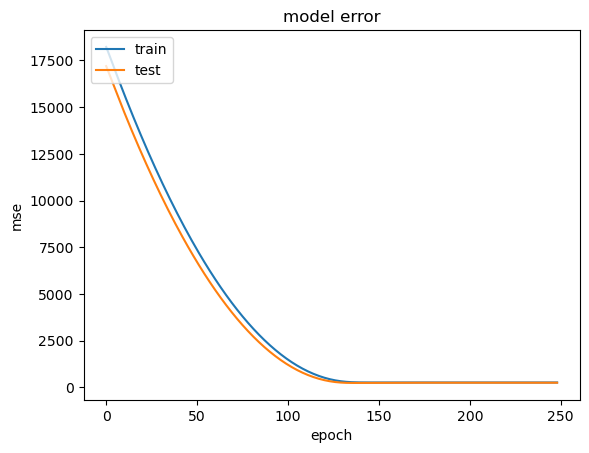

In [70]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
#  model3 has comparable accuracy and model is computationally simpler so model1 is taken as final model

In [72]:
model_final=model